### Examine poorly imputed sites

In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
base_dir = Path("/Users/szhan/Projects/tsimpute")
csv_file = base_dir / "viz" / "pass_3_examine_2.imputation.results.csv"
df = pd.read_csv(csv_file, comment="#")

### How many poorly imputed sites are among sites with MAF at least 0.05?

In [3]:
df.shape[0]

467

### Are there clusters of sites with low IQS?

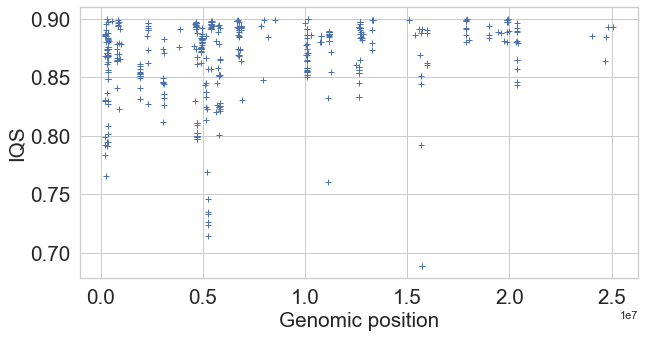

In [4]:
plt.figure(figsize=(10, 5,))
plt.ylabel("IQS", fontsize="xx-large")
plt.xlabel("Genomic position", fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.xticks(fontsize="xx-large")
plt.plot(
    df["position"],
    df["iqs"],
    linestyle="none",
    marker="+",
    markersize=6,
);

### How many mutations are there per site?

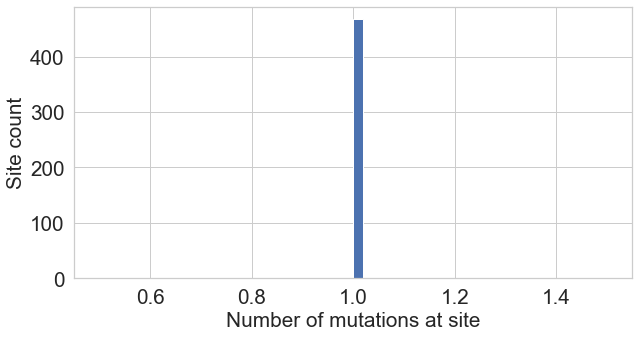

In [5]:
plt.figure(figsize=(10, 5,))
plt.ylabel("Site count", fontsize="xx-large")
plt.xlabel("Number of mutations at site", fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.xticks(fontsize="xx-large")
plt.hist(
    df["num_muts"],
    bins=50,
);


### How often are the ancestral alleles REF or ALT?

In [6]:
perc_aa_ref = np.sum(df["is_aa_ref"] == 1) / df.shape[0]
perc_aa_alt = np.sum(df["is_aa_ref"] == 0) / df.shape[0]
print(f"Perc. sites where AA is REF = {round(perc_aa_ref * 100, 2)}")
print(f"Perc. sites where AA is ALT = {round(perc_aa_alt * 100, 2)}")

Perc. sites where AA is REF = 65.74
Perc. sites where AA is ALT = 34.26


### How often are the ancestral alleles parsimonious?

In [7]:
perc_aa_parsimonious = np.sum(df["is_aa_parsimonious"] == 1) / df.shape[0] * 100
perc_aa_not_parsimonious = np.sum(df["is_aa_parsimonious"] == 0) / df.shape[0] * 100
print(f"Perc. sites where AA is     parsimonious = {round(perc_aa_parsimonious, 2)}")
print(f"Perc. sites where AA is not parsimonious = {round(perc_aa_not_parsimonious, 2)}")

Perc. sites where AA is     parsimonious = 100.0
Perc. sites where AA is not parsimonious = 0.0


### How often are the wrongly imputed alleles ancestral?

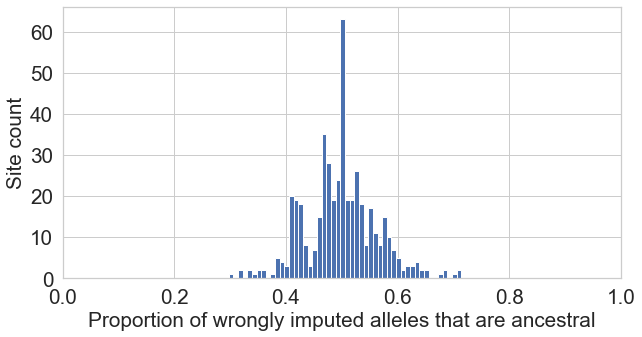

In [8]:
plt.figure(figsize=(10, 5,))
plt.ylabel("Site count", fontsize="xx-large")
plt.xlabel("Proportion of wrongly imputed alleles that are ancestral",
           fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.xticks(fontsize="xx-large")
plt.xlim(0, 1)
plt.hist(
    df["prop_wrong_alleles_0"],
    bins=50,
);

### How often are the wrongly imputed alleles REF?

In [9]:
prop_wrong_alleles_REF = np.empty(df.shape[0])
for i in np.arange(df.shape[0]):
    if df["is_aa_ref"][i] == 1:
        prop_wrong_alleles_REF[i] = df["prop_wrong_alleles_0"][i]
    else:
        prop_wrong_alleles_REF[i] = 1 - df["prop_wrong_alleles_0"][i]

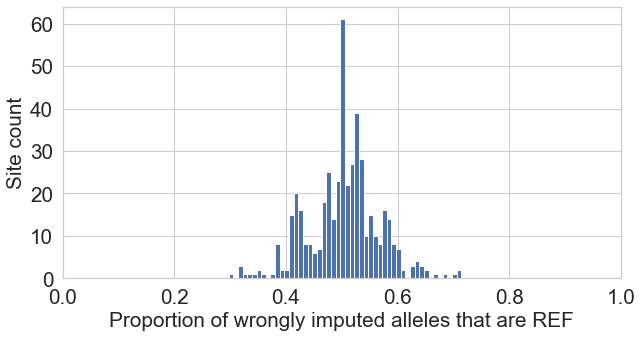

In [10]:
plt.figure(figsize=(10, 5,))
plt.ylabel("Site count", fontsize="xx-large")
plt.xlabel("Proportion of wrongly imputed alleles that are REF",
           fontsize="xx-large")
plt.yticks(fontsize="xx-large")
plt.xticks(fontsize="xx-large")
plt.xlim(0, 1)
plt.hist(
    prop_wrong_alleles_REF,
    bins=50,
);